In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# column_names = ['Class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', 'area-damaged', 'severity', 'seed-tmt',
#                 'germination', 'plant-growth', 'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
#                 'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers', 'canker-lesion',
#                 'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods',
#                 'fruit spots', 'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots']
df_original = pd.read_csv('soybean_csv.csv')  # , names=column_names)
df_original.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [3]:
df_original.shape

(683, 36)

In [4]:
for col in df_original.columns:
    print(f'Unique values in column {col}: {len(pd.unique(df_original[col]))}')

Unique values in column date: 8
Unique values in column plant-stand: 3
Unique values in column precip: 4
Unique values in column temp: 4
Unique values in column hail: 3
Unique values in column crop-hist: 5
Unique values in column area-damaged: 5
Unique values in column severity: 4
Unique values in column seed-tmt: 4
Unique values in column germination: 4
Unique values in column plant-growth: 3
Unique values in column leaves: 2
Unique values in column leafspots-halo: 4
Unique values in column leafspots-marg: 4
Unique values in column leafspot-size: 4
Unique values in column leaf-shread: 3
Unique values in column leaf-malf: 3
Unique values in column leaf-mild: 4
Unique values in column stem: 3
Unique values in column lodging: 3
Unique values in column stem-cankers: 5
Unique values in column canker-lesion: 5
Unique values in column fruiting-bodies: 3
Unique values in column external-decay: 4
Unique values in column mycelium: 3
Unique values in column int-discolor: 4
Unique values in colum

In [5]:
frequency_ratio_threshold = 0.2
columns_to_drop = []

for col in df_original.columns:
    unique_vals = pd.unique(df_original[col])
    uniques_occurances = []
    for val in unique_vals:
        uniques_occurances.append(np.sum(df_original[col] == val))

    two_most = np.take(uniques_occurances, np.argsort(uniques_occurances)[-2:][::-1])
    ratio = two_most[1] / two_most[0]
    if ratio < frequency_ratio_threshold:
        print(f'{col} - Ratio of frequencies of second to first unique value is to low. ({ratio})')
        columns_to_drop.append(col)
    else:
        print(f'{col} - Ratio is good. ({ratio})')

date - Ratio is good. (0.8791946308724832)
plant-stand - Ratio is good. (0.827683615819209)
precip - Ratio is good. (0.2440087145969499)
temp - Ratio is good. (0.5320855614973262)
hail - Ratio is good. (0.29195402298850576)
crop-hist - Ratio is good. (0.9954337899543378)
area-damaged - Ratio is good. (0.8237885462555066)
severity - Ratio is good. (0.6055900621118012)
seed-tmt - Ratio is good. (0.7278688524590164)
germination - Ratio is good. (0.9061032863849765)
plant-growth - Ratio is good. (0.5124716553287982)
leaves - Ratio of frequencies of second to first unique value is to low. (0.12706270627062707)
leafspots-halo - Ratio is good. (0.6461988304093568)
leafspots-marg - Ratio is good. (0.6190476190476191)
leafspot-size - Ratio is good. (0.6758409785932722)
leaf-shread - Ratio of frequencies of second to first unique value is to low. (0.1971252566735113)
leaf-malf - Ratio of frequencies of second to first unique value is to low. (0.0812274368231047)
leaf-mild - Ratio of frequencies 

(array([625.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

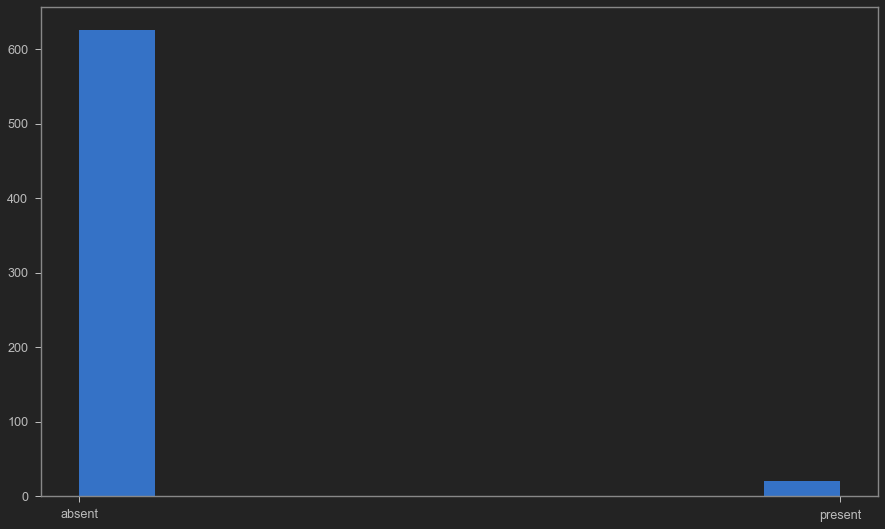

In [6]:
hist_col = 'sclerotia'
plt.hist(df_original[~df_original[hist_col].isna()][hist_col])

In [7]:
df = df_original.drop(columns=columns_to_drop, inplace=False)
df.shape

(683, 23)

In [8]:
np.sum(df.isna(), axis=0)

date                 1
plant-stand         36
precip              38
temp                30
hail               121
crop-hist           16
area-damaged         1
severity           121
seed-tmt           121
germination        112
plant-growth        16
leafspots-halo      84
leafspots-marg      84
leafspot-size       84
stem                16
stem-cankers        38
canker-lesion       38
fruiting-bodies    106
external-decay      38
fruit-pods          84
fruit-spots        106
seed                92
class                0
dtype: int64

<AxesSubplot:>

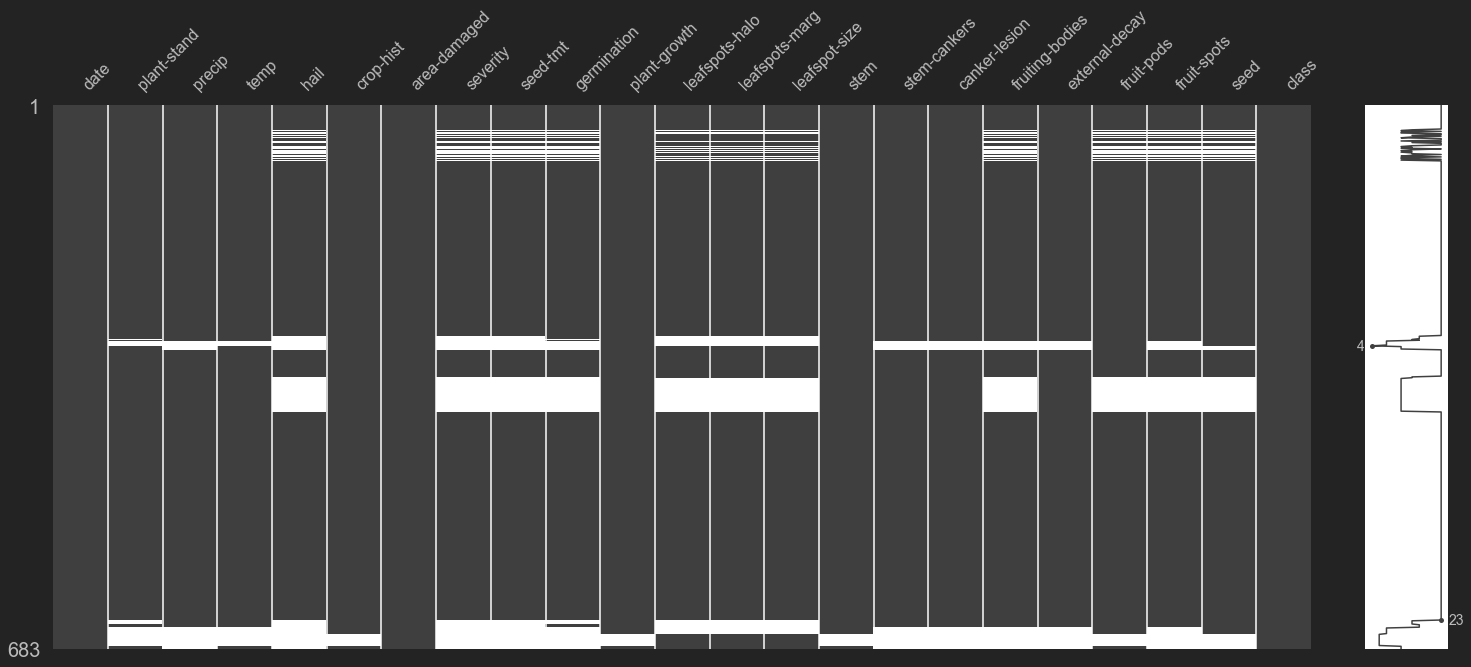

In [9]:
msno.matrix(df)

<AxesSubplot:>

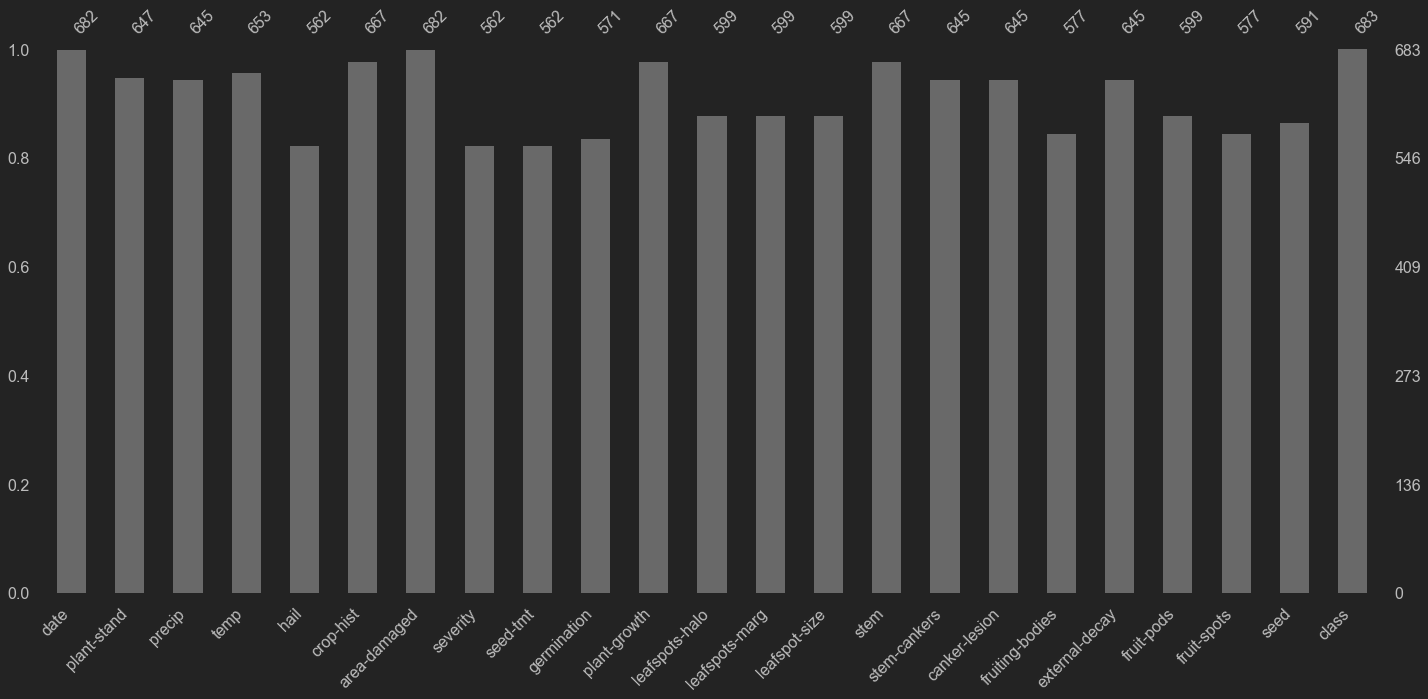

In [10]:
msno.bar(df)

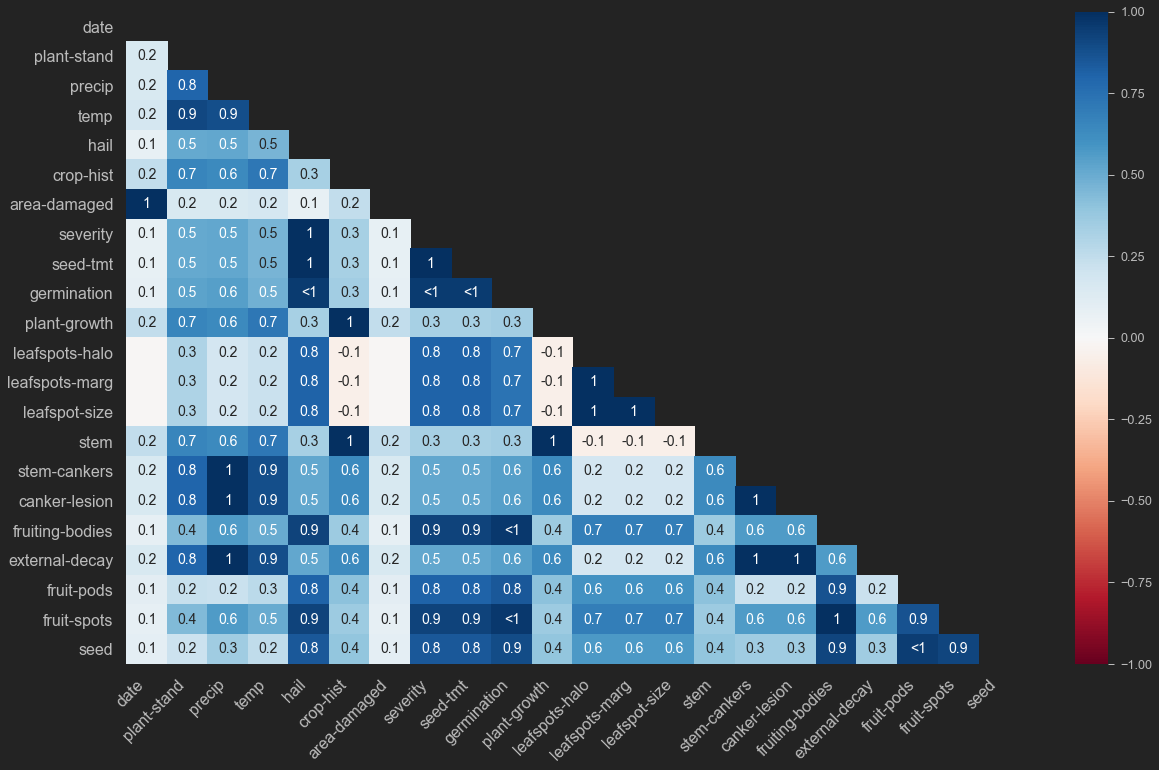

In [11]:
msno.heatmap(df);

In [12]:
unique_classes = pd.unique(df['class'])
missing_values = df.isna().to_numpy()
print('Missing values for class:')
for uni_class in unique_classes:
    class_mask = df['class'] == uni_class
    print(f'{uni_class} - {missing_values[class_mask].sum()}')

Missing values for class:
diaporthe-stem-canker - 0
charcoal-rot - 0
rhizoctonia-root-rot - 0
phytophthora-rot - 709
brown-stem-rot - 0
powdery-mildew - 0
downy-mildew - 0
brown-spot - 0
bacterial-blight - 0
bacterial-pustule - 0
purple-seed-stain - 0
anthracnose - 0
phyllosticta-leaf-spot - 0
alternarialeaf-spot - 0
frog-eye-leaf-spot - 0
diaporthe-pod-&-stem-blight - 102
cyst-nematode - 210
2-4-d-injury - 274
herbicide-injury - 88


### 1. Change nans to string.
### 2. Encode
### 3. Change string nans to real nans
### 4. Impute
### 5. Decode

In [13]:
df

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,leafspot-size,stem,stem-cankers,canker-lesion,fruiting-bodies,external-decay,fruit-pods,fruit-spots,seed,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,dna,abnorm,above-sec-nde,brown,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,dna,abnorm,above-sec-nde,brown,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,dna,abnorm,above-sec-nde,dna,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,dna,abnorm,above-sec-nde,dna,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,dna,abnorm,above-sec-nde,brown,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,april,NaN,NaN,NaN,NaN,NaN,upper-areas,NaN,NaN,NaN,...,dna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-4-d-injury
679,april,lt-normal,NaN,lt-norm,NaN,diff-lst-year,scattered,NaN,NaN,NaN,...,dna,abnorm,NaN,NaN,NaN,NaN,dna,NaN,NaN,herbicide-injury
680,june,lt-normal,NaN,lt-norm,NaN,diff-lst-year,scattered,NaN,NaN,NaN,...,dna,abnorm,NaN,NaN,NaN,NaN,dna,NaN,NaN,herbicide-injury
681,april,lt-normal,NaN,lt-norm,NaN,same-lst-yr,whole-field,NaN,NaN,NaN,...,gt-1/8,abnorm,NaN,NaN,NaN,NaN,dna,NaN,NaN,herbicide-injury


In [31]:
nans_mask = df == 'NaN'
df.fillna('NaN', inplace=True)

In [32]:
encoder = OrdinalEncoder()
encoder.fit(df)
encoder.categories_

[array(['NaN', 'april', 'august', 'july', 'june', 'may', 'october',
        'september'], dtype=object),
 array(['NaN', 'lt-normal', 'normal'], dtype=object),
 array(['NaN', 'gt-norm', 'lt-norm', 'norm'], dtype=object),
 array(['NaN', 'gt-norm', 'lt-norm', 'norm'], dtype=object),
 array(['NaN', 'no', 'yes'], dtype=object),
 array(['NaN', 'diff-lst-year', 'same-lst-sev-yrs', 'same-lst-two-yrs',
        'same-lst-yr'], dtype=object),
 array(['NaN', 'low-areas', 'scattered', 'upper-areas', 'whole-field'],
       dtype=object),
 array(['NaN', 'minor', 'pot-severe', 'severe'], dtype=object),
 array(['NaN', 'fungicide', 'none', 'other'], dtype=object),
 array(['80-89', '90-100', 'NaN', 'lt-80'], dtype=object),
 array(['NaN', 'abnorm', 'norm'], dtype=object),
 array(['NaN', 'absent', 'no-yellow-halos', 'yellow-halos'], dtype=object),
 array(['NaN', 'dna', 'no-w-s-marg', 'w-s-marg'], dtype=object),
 array(['NaN', 'dna', 'gt-1/8', 'lt-1/8'], dtype=object),
 array(['NaN', 'abnorm', 'norm'], dtyp

In [36]:
df_encoded = encoder.transform(df)
df_encoded

array([[ 6.,  2.,  1., ...,  4.,  2., 10.],
       [ 2.,  2.,  1., ...,  4.,  2., 10.],
       [ 3.,  2.,  1., ...,  4.,  2., 10.],
       ...,
       [ 4.,  1.,  0., ...,  0.,  0., 13.],
       [ 1.,  1.,  0., ...,  0.,  0., 13.],
       [ 4.,  1.,  0., ...,  0.,  0., 13.]])

In [40]:
df_encoded[nans_mask] = np.nan
df_encoded

array([[ 6.,  2.,  1., ...,  4.,  2., 10.],
       [ 2.,  2.,  1., ...,  4.,  2., 10.],
       [ 3.,  2.,  1., ...,  4.,  2., 10.],
       ...,
       [ 4.,  1., nan, ..., nan, nan, 13.],
       [ 1.,  1., nan, ..., nan, nan, 13.],
       [ 4.,  1., nan, ..., nan, nan, 13.]])

In [41]:
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(df_encoded)
df_imputed

array([[ 6.,  2.,  1., ...,  4.,  2., 10.],
       [ 2.,  2.,  1., ...,  4.,  2., 10.],
       [ 3.,  2.,  1., ...,  4.,  2., 10.],
       ...,
       [ 4.,  1.,  2., ...,  4.,  2., 13.],
       [ 1.,  1.,  1., ...,  3.,  2., 13.],
       [ 4.,  1.,  1., ...,  3.,  2., 13.]])

In [46]:
df_final = pd.DataFrame(data=encoder.inverse_transform(df_imputed), columns=df.columns)
df_final

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,leafspot-size,stem,stem-cankers,canker-lesion,fruiting-bodies,external-decay,fruit-pods,fruit-spots,seed,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,dna,abnorm,above-sec-nde,brown,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,dna,abnorm,above-sec-nde,brown,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,dna,abnorm,above-sec-nde,dna,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,dna,abnorm,above-sec-nde,dna,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,dna,abnorm,above-sec-nde,brown,present,firm-and-dry,norm,dna,norm,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,april,lt-normal,gt-norm,lt-norm,no,same-lst-sev-yrs,upper-areas,pot-severe,fungicide,90-100,...,dna,abnorm,above-sec-nde,brown,absent,firm-and-dry,dna,absent,abnorm,2-4-d-injury
679,april,lt-normal,gt-norm,lt-norm,yes,diff-lst-year,scattered,pot-severe,none,NaN,...,dna,abnorm,below-soil,dk-brown-blk,absent,absent,dna,dna,norm,herbicide-injury
680,june,lt-normal,lt-norm,lt-norm,yes,diff-lst-year,scattered,severe,fungicide,NaN,...,dna,abnorm,absent,dk-brown-blk,absent,absent,dna,dna,norm,herbicide-injury
681,april,lt-normal,gt-norm,lt-norm,yes,same-lst-yr,whole-field,pot-severe,fungicide,90-100,...,gt-1/8,abnorm,above-sec-nde,dk-brown-blk,absent,firm-and-dry,dna,colored,norm,herbicide-injury


<AxesSubplot:>

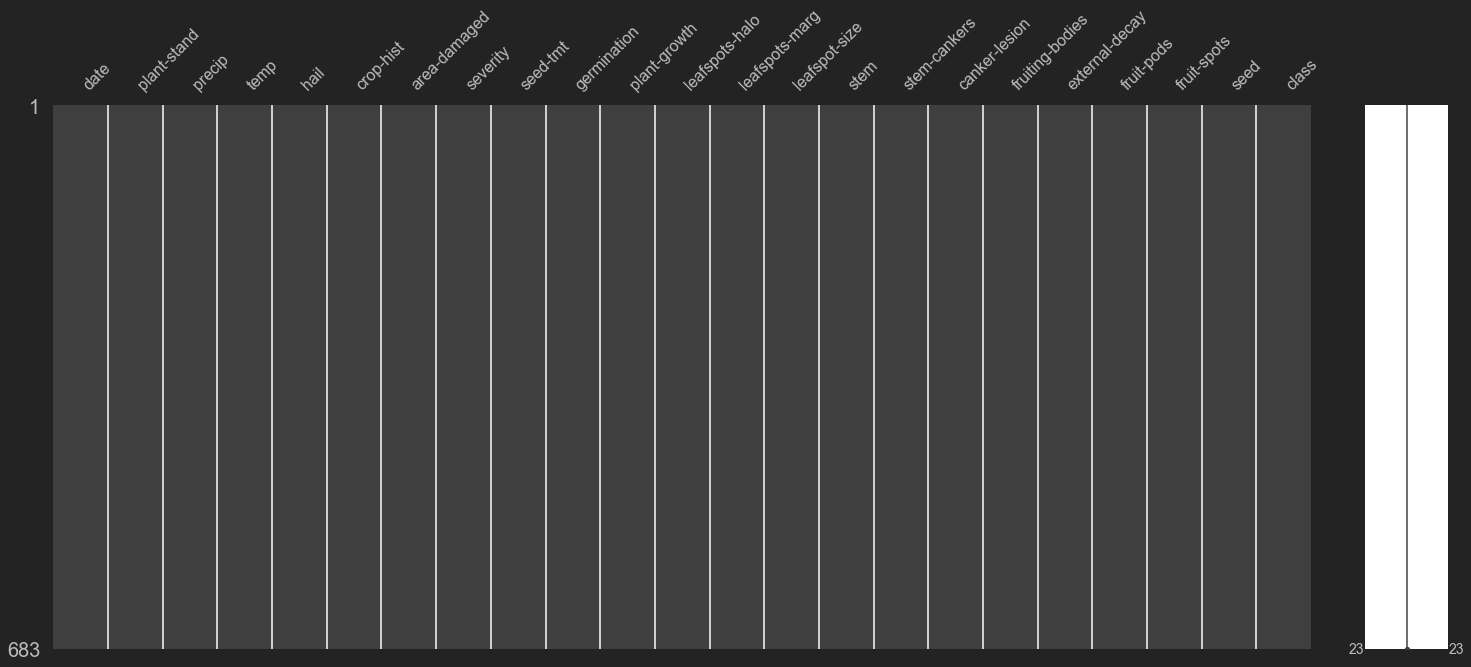

In [47]:
msno.matrix(df_final)